In [1]:
import pandas as pd
import numpy as np
import scipy as sp
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

from datetime import datetime

# Pandas introduction

In [2]:
# Read the data and create DataFrame from it
data = pd.read_csv('16.csv', sep=';')

In [3]:
# Check a few rows of the table
data.head()

,Unnamed: 0,name,area,class,gray_Mean,gray_Variance,gray_Skewness,gray_Kurtosis,gray_Perc.01%,gray_Perc.10%,...,"b_S(5,-5)SumVarnc","b_S(5,-5)SumEntrp","b_S(5,-5)Entropy","b_S(5,-5)DifVarnc","b_S(5,-5)DifEntrp",b_GrMean,b_GrVariance,b_GrSkewness,b_GrKurtosis,b_GrNonZeros
0,504914,25-May-2012 12-44-02,100,DZN,"162,87","25,6731","0,0556933442808038","-0,847312470433456","153,0","156,0",...,"19020,2920239063","1,0185245113550199","1,59059920589699","37,6861925522195","1,00034500883477","4,04366697163015","4,68000742254742","0,469840716855728","-0,739006133152813","1,0"
1,504915,25-May-2012 12-44-02,100,DZN,"163,22","34,0916","-0,184628743255271","-1,17512428138866","152,0","155,0",...,"18872,185673506498","1,12394386122761","1,62672280537666","27,945501012950896","0,861753508048933","4,51488268129824","4,38145937411324","0,139565167526377","-0,8441575745042179","1,0"
2,504916,25-May-2012 12-44-02,100,DZN,"166,02","36,3396","-0,213090557717068","-1,34859723534067","155,0","158,0",...,"18936,2296403973","0,9450748123142929","1,50017250441739","34,9389659370051","0,9521802095285329","3,42635982214587","2,77568336918453","0,258781983309002","-0,45019100421053404","0,96875"
3,504917,25-May-2012 12-44-02,100,DZN,"163,57","32,7051","-0,23953206151099998","-0,7412659193903579","151,0","155,0",...,"19341,6490470399","1,0185245113550199","1,5694682548103003","21,2180474577127","0,793004206059718","3,5684615219362903","3,68795736646017","0,44332061765059905","0,0231065255473104","0,953125"
4,504918,25-May-2012 12-44-02,100,DZN,"162,73","35,4571","-0,0356651425692793","-1,45781568758918","153,0","155,0",...,"18475,989997983","0,9944421117018969","1,63876400520322","45,426724314094706","0,9944421117018969","4,28622945998813","4,92511201632983","-0,0128182902511431","-1,1049856517508898","1,0"


In [4]:
y = data.pop('class')
#даже если переводить всё это дело в таймстамп, получается так себе
data.pop('name')
x = data

In [5]:
#форматируем всю х***ю
#datePattern = '%d-%B-%Y %H-%M-%S'
cols = x.columns
#for index, row in x.head().iterrows():
for index, row in x.iterrows():
    #мутирущий код зло, но мне лень -_-
    #if (isinstance(x.at[index, 'name'], str)):
    #    trueDate = datetime.strptime(x.at[index, 'name'], datePattern)
    #    x.at[index, 'name'] = datetime.timestamp(trueDate)
    
    for col in cols:
        if (isinstance(x.at[index, col], str)):
            x.at[index, col] = x.at[index, col].replace(',', '.', 1)

In [6]:
#меням тип
for col in cols:
    x[col] = pd.to_numeric(x[col])

In [7]:
#сдвигаем отрицательные
for col in cols:
    minColVal = x[col].min()
    if (minColVal < 0):
        for index, row in x.iterrows():
            x.at[index, col] -= minColVal

In [8]:
x.dtypes

Unnamed: 0               int64
area                     int64
gray_Mean              float64
gray_Variance          float64
gray_Skewness          float64
gray_Kurtosis          float64
gray_Perc.01%          float64
gray_Perc.10%          float64
gray_Perc.50%          float64
gray_Perc.90%          float64
gray_Perc.99%          float64
gray_S(1,0)AngScMom    float64
gray_S(1,0)Contrast    float64
gray_S(1,0)Correlat    float64
gray_S(1,0)SumOfSqs    float64
gray_S(1,0)InvDfMom    float64
gray_S(1,0)SumAverg    float64
gray_S(1,0)SumVarnc    float64
gray_S(1,0)SumEntrp    float64
gray_S(1,0)Entropy     float64
gray_S(1,0)DifVarnc    float64
gray_S(1,0)DifEntrp    float64
gray_S(0,1)AngScMom    float64
gray_S(0,1)Contrast    float64
gray_S(0,1)Correlat    float64
gray_S(0,1)SumOfSqs    float64
gray_S(0,1)InvDfMom    float64
gray_S(0,1)SumAverg    float64
gray_S(0,1)SumVarnc    float64
gray_S(0,1)SumEntrp    float64
                        ...   
b_S(0,5)Entropy        float64
b_S(0,5)

In [9]:
x.head()

,Unnamed: 0,area,gray_Mean,gray_Variance,gray_Skewness,gray_Kurtosis,gray_Perc.01%,gray_Perc.10%,gray_Perc.50%,gray_Perc.90%,...,"b_S(5,-5)SumVarnc","b_S(5,-5)SumEntrp","b_S(5,-5)Entropy","b_S(5,-5)DifVarnc","b_S(5,-5)DifEntrp",b_GrMean,b_GrVariance,b_GrSkewness,b_GrKurtosis,b_GrNonZeros
0,504914,100,162.87,25.6731,4.782574,0.792091,153.0,156.0,163.0,170.0,...,19020.292024,1.018525,1.590599,37.686193,1.000345,4.043667,4.680007,1.498812,0.832643,1.000000
1,504915,100,163.22,34.0916,4.542252,0.464279,152.0,155.0,164.0,170.0,...,18872.185674,1.123944,1.626723,27.945501,0.861754,4.514883,4.381459,1.168537,0.727492,1.000000
2,504916,100,166.02,36.3396,4.513790,0.290806,155.0,158.0,167.0,173.0,...,18936.229640,0.945075,1.500173,34.938966,0.952180,3.426360,2.775683,1.287754,1.121458,0.968750
3,504917,100,163.57,32.7051,4.487349,0.898137,151.0,155.0,164.0,171.0,...,19341.649047,1.018525,1.569468,21.218047,0.793004,3.568462,3.687957,1.472292,1.594756,0.953125
4,504918,100,162.73,35.4571,4.691216,0.181587,153.0,155.0,163.0,170.0,...,18475.989998,0.994442,1.638764,45.426724,0.994442,4.286229,4.925112,1.016153,0.466664,1.000000


In [10]:
y.head()

0    DZN
1    DZN
2    DZN
3    DZN
4    DZN
Name: class, dtype: object

In [11]:
# Get statistical data about each column.
# Percents are percentiles.
x.describe()

,Unnamed: 0,area,gray_Mean,gray_Variance,gray_Skewness,gray_Kurtosis,gray_Perc.01%,gray_Perc.10%,gray_Perc.50%,gray_Perc.90%,...,"b_S(5,-5)SumVarnc","b_S(5,-5)SumEntrp","b_S(5,-5)Entropy","b_S(5,-5)DifVarnc","b_S(5,-5)DifEntrp",b_GrMean,b_GrVariance,b_GrSkewness,b_GrKurtosis,b_GrNonZeros
count,13054.000000,13054.000000,13054.000000,13054.000000,13054.000000,13054.000000,13054.000000,13054.000000,13054.000000,13054.000000,...,13054.000000,13054.000000,13054.000000,13054.000000,13054.000000,13054.000000,13054.000000,13054.000000,13054.000000,13054.000000
mean,511440.500000,194.973495,94.871472,69.240101,4.657924,1.787490,81.192355,86.364486,95.064425,103.033553,...,9592.727202,1.141457,1.724967,54.757256,0.933927,4.045156,5.641951,1.554003,1.615294,0.957015
std,3768.509542,88.204102,59.449186,120.606633,0.790528,1.812185,53.097346,55.425346,59.957497,63.289088,...,14607.298449,0.251659,0.302309,114.307416,0.178300,1.520034,4.348536,0.365311,0.956546,0.042559
min,504914.000000,100.000000,21.140000,0.349900,0.000000,0.000000,19.000000,20.000000,21.000000,22.000000,...,4.389846,0.414682,0.754476,1.909848,0.474179,1.462630,0.907587,0.000000,0.000000,0.656250
25%,508177.250000,144.000000,30.840278,6.574523,4.247513,0.889091,26.000000,29.000000,31.000000,34.000000,...,126.566330,0.955678,1.497221,9.240315,0.790987,2.992791,3.180236,1.337618,1.041095,0.942149
50%,511440.500000,169.000000,89.143632,21.104876,4.687700,1.330187,77.000000,82.000000,89.000000,96.000000,...,4429.337361,1.105419,1.690076,17.167436,0.907402,3.675206,4.045901,1.535591,1.406331,0.970000
75%,514703.750000,256.000000,122.958554,73.813337,5.110969,2.077034,109.000000,114.000000,122.000000,136.000000,...,10143.483819,1.295186,1.921372,47.496268,1.056141,4.536136,5.984575,1.732911,1.877999,0.984694
max,517967.000000,400.000000,231.990000,1335.604423,7.277537,29.896916,230.000000,232.000000,232.000000,233.000000,...,85405.489307,1.952741,2.593662,1508.055840,1.608006,12.099595,46.184069,3.389114,13.228133,1.000000


In order to get values from the DataFrame use the `.values` field.

In [12]:
# You can check the values yourself if you want
type(x.values), type(y.values)

(numpy.ndarray, numpy.ndarray)

In [13]:
# Other fields
x.columns

Index(['Unnamed: 0', 'area', 'gray_Mean', 'gray_Variance', 'gray_Skewness',
       'gray_Kurtosis', 'gray_Perc.01%', 'gray_Perc.10%', 'gray_Perc.50%',
       'gray_Perc.90%',
       ...
       'b_S(5,-5)SumVarnc', 'b_S(5,-5)SumEntrp', 'b_S(5,-5)Entropy',
       'b_S(5,-5)DifVarnc', 'b_S(5,-5)DifEntrp', 'b_GrMean', 'b_GrVariance',
       'b_GrSkewness', 'b_GrKurtosis', 'b_GrNonZeros'],
      dtype='object', length=938)

# Feature selection

The data features that you use to train your machine learning models have a huge influence on the performance you can achieve.
<b>Irrelevant or partially relevant features can negatively impact model performance.</b>
Feature selection and Data cleaning should be the first and most important step of your model designing.

Why feature selection must be done:
<ul>
    <li><b>Reduces Overfitting</b>: Less redundant data means less opportunity to make decisions based on noise.</li>
    <li><b>Improves Accuracy</b>: Less misleading data means modeling accuracy improves.</li>
    <li><b>Reduces Training Time</b>: Fewer data points reduce algorithm complexity and algorithms train faster.</li>
</ul>

In [14]:
# There are several ways to do feature selection. 
# For this purpose sklearn provides SelectKBest class.
from sklearn.feature_selection import SelectKBest, chi2
# Use feature importance field of the Extra Tree Classifier.
from sklearn.ensemble import ExtraTreesClassifier

### SelectKBest

This class selects `k` best features that correspond to the highest scores. The scores are formed by the `score_func`.
In this example we use `chi2` score function.

In [15]:
best_features = SelectKBest(score_func=chi2, k=10)

In [16]:
fit = best_features.fit(x.values, y.values)
#fit = best_features.fit((x.values - x.values.mean(axis=0))/x.values.std(axis=0), y.values)

In [17]:
# Create DataFrame from given data with given columns and indeces
best_features = pd.DataFrame(data=fit.scores_, index=x.columns, columns=['chi2_score'])

### Топ информативных признаков для алгоритма k-лучших с chi2

In [18]:
# Sort rows by the absolute value
best_features.nlargest(10, 'chi2_score')

,chi2_score
"r_S(3,-3)SumVarnc",5.537507e+08
"r_S(4,-4)SumVarnc",5.534298e+08
"r_S(3,3)SumVarnc",5.533787e+08
"r_S(2,-2)SumVarnc",5.533365e+08
"r_S(2,2)SumVarnc",5.531608e+08
"r_S(4,4)SumVarnc",5.528767e+08
"r_S(5,-5)SumVarnc",5.524278e+08
"r_S(3,0)SumVarnc",5.522630e+08
"r_S(1,-1)SumVarnc",5.521804e+08
"r_S(1,1)SumVarnc",5.521182e+08


In [19]:
# This is a simple linear classifier trained using Stochastic Gradient Descent
from sklearn.linear_model import SGDClassifier

In [20]:
colsSize = cols.size
step = 150
rangeSize = int(colsSize / step + 1)
print(rangeSize)

7


In [21]:
#colsSize = int(cols.size / 2)
chi2_scores = np.zeros(rangeSize)
j = 0
for i in range(10, colsSize, step):
    selected_cols_names = best_features.nlargest(i, 'chi2_score').index.values
    x_selected = x[selected_cols_names]
    
    model_unnorm = SGDClassifier(loss='log', penalty='l1', l1_ratio=1.)
    model_unnorm = model_unnorm.fit(x_selected.values, y.values)
    chi2_scores[j] = model_unnorm.score(x_selected.values, y.values)
    print(f'For features count {i} score is {chi2_scores[j]}')
    j += 1

For features count 10 score is 0.29339666002757775
For features count 160 score is 0.8192891067871917
For features count 310 score is 0.8334610081201165
For features count 460 score is 0.8513865481844646
For features count 610 score is 0.8876972575455799
For features count 760 score is 0.89321280833461
For features count 910 score is 0.8811858434196415


### Feature importance (Extra Tree Classifier)

In [22]:
model = ExtraTreesClassifier()
model = model.fit(x.values, y.values)
#model = model.fit((x.values - x.values.mean(axis=0))/x.values.std(axis=0), y.values)

/opt/conda/envs/jupyter_env/lib/python3.6/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


In [23]:
# Create DataFrame from given data with given columns and indeces
best_features = pd.DataFrame(data=model.feature_importances_, index=x.columns, columns=['feature_importance'])

### Топ информативных признаков для Extra Tree Classifier

In [24]:
# Sort rows by the absolute value
best_features.nlargest(10, 'feature_importance')

,feature_importance
"r_S(5,-5)SumVarnc",0.058184
"g_S(0,2)SumAverg",0.051768
g_Mean,0.043449
"r_S(4,-4)SumAverg",0.043339
"gray_S(1,-1)SumVarnc",0.043121
g_Perc.10%,0.043086
"gray_S(5,0)SumAverg",0.043080
"g_S(3,3)SumVarnc",0.041234
"gray_S(3,-3)SumAverg",0.040859
"b_S(0,3)SumEntrp",0.028645


In [25]:
#colsSize = int(cols.size / 2)
feature_importances_scores = np.zeros(rangeSize)
j = 0
for i in range(10, colsSize, step):
    selected_cols_names = best_features.nlargest(i, 'feature_importance').index.values
    x_selected = x[selected_cols_names]
    
    model_unnorm = SGDClassifier(loss='log', penalty='l1', l1_ratio=1.)
    model_unnorm = model_unnorm.fit(x_selected.values, y.values)
    feature_importances_scores[j] = model_unnorm.score(x_selected.values, y.values)
    print(f'For features count {i} score is {feature_importances_scores[j]}')
    j += 1

For features count 10 score is 0.866324498238088
For features count 160 score is 0.8517695725448139
For features count 310 score is 0.8475563045809713
For features count 460 score is 0.8386701394208672
For features count 610 score is 0.8431898268729892
For features count 760 score is 0.8646391910525509
For features count 910 score is 0.8871610234410908


### График зависимости точности от числа информативных признаков для метода Extra Tree Classifier и chi2.

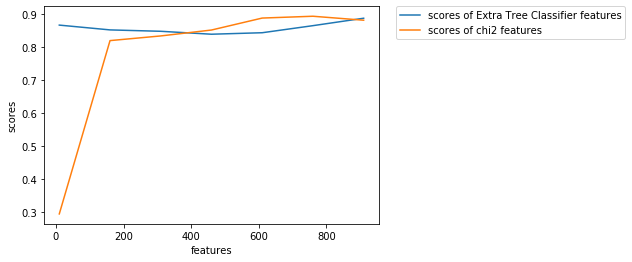

In [26]:
t = np.arange(10, colsSize, step)
plt.plot(t, feature_importances_scores, label="scores of Extra Tree Classifier features")
plt.plot(t, chi2_scores, label="scores of chi2 features")
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)
plt.ylabel('scores')
plt.xlabel('features')
plt.show()

### Correlation matrix

In [27]:
# DataFrame allows to calculate correlation matrix for the inner data
best_cols = best_features.nlargest(22, 'feature_importance').index.values
x_selected = x[best_cols]
correlation_matrix = x_selected.corr()

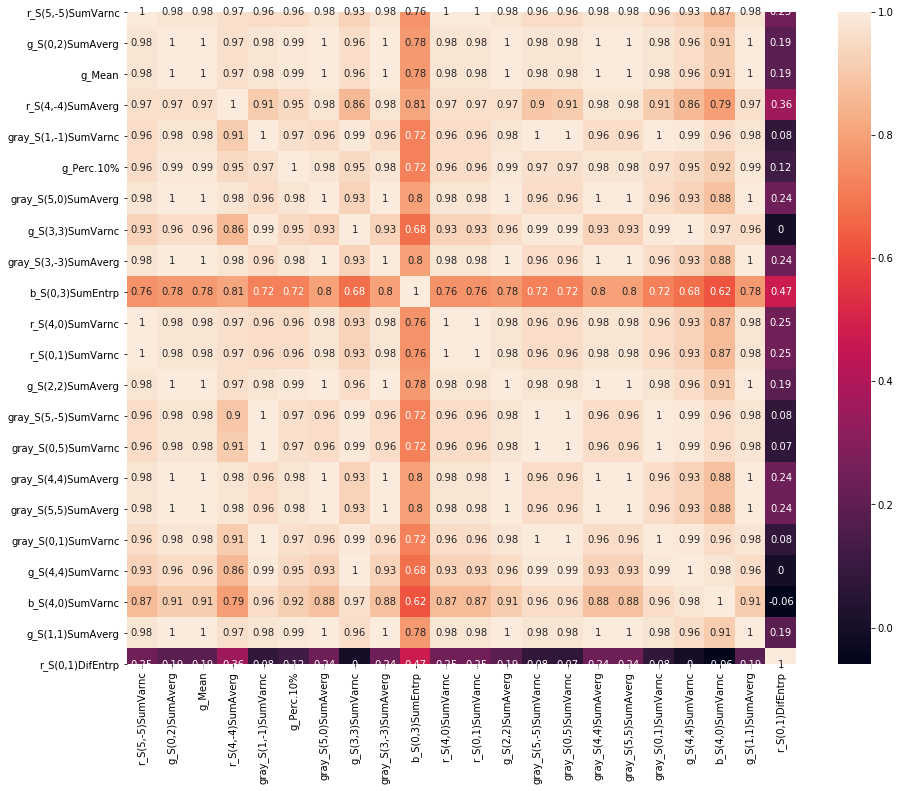

In [28]:
import seaborn as sns
plt.figure(figsize=(15,12))
sns.heatmap(np.round(correlation_matrix, decimals=2), annot=True)

### Lasso regression

Before training the model it is important to normalize the data - constrain all the values to the uniform range (make variance=1 and mean=0).
It is needed because features with small values can be 'shadowed' by the features with the larger values. It happenes not due to the high importance of the (large) feature but because of its large absolute value itself.

#### Train with unnormalized data

In [29]:
model_unnorm = SGDClassifier(loss='log', penalty='l1', l1_ratio=1.)

In [30]:
model_unnorm = model_unnorm.fit(x.values, y.values)

In [31]:
model_unnorm.score(x.values, y.values)

0.8792707216178949

In [32]:
y_pred = model_unnorm.predict(x.values)

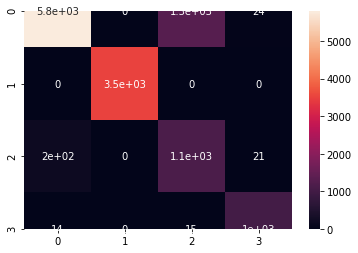

In [33]:
sns.heatmap(confusion_matrix(y_pred, y), annot=True)

#### Train with normalized data

In [34]:
model_norm = SGDClassifier(loss='log', penalty='l1', l1_ratio=1., alpha=0.01)

In [35]:
model_norm = model_norm.fit((x.values - x.values.mean(axis=0))/x.values.std(axis=0), y.values)

In [36]:
model_norm.score((x.values - x.values.mean(axis=0))/x.values.std(axis=0), y.values)

0.9165772943159185

In [37]:
y_pred = model_norm.predict((x.values - x.values.mean(axis=0))/x.values.std(axis=0))

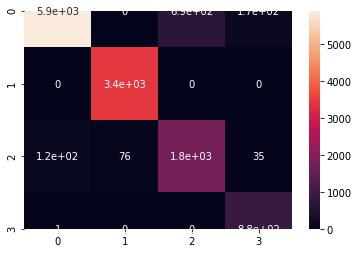

In [38]:
sns.heatmap(confusion_matrix(y_pred, y), annot=True)

#### Checking the features' importance

This classifiers consists of several linear regressions - one regression for each class.

In [39]:
model_unnorm.coef_.shape

(4, 938)

The matrix consists of 4 rows with 20 elements each (one for each input feature). Each row corresponds to the coefficients of one linear regression for one class. 
Thus, by looking at the absolute values of each coefficient in the rows we can see the importance of the features to the corresponding class.

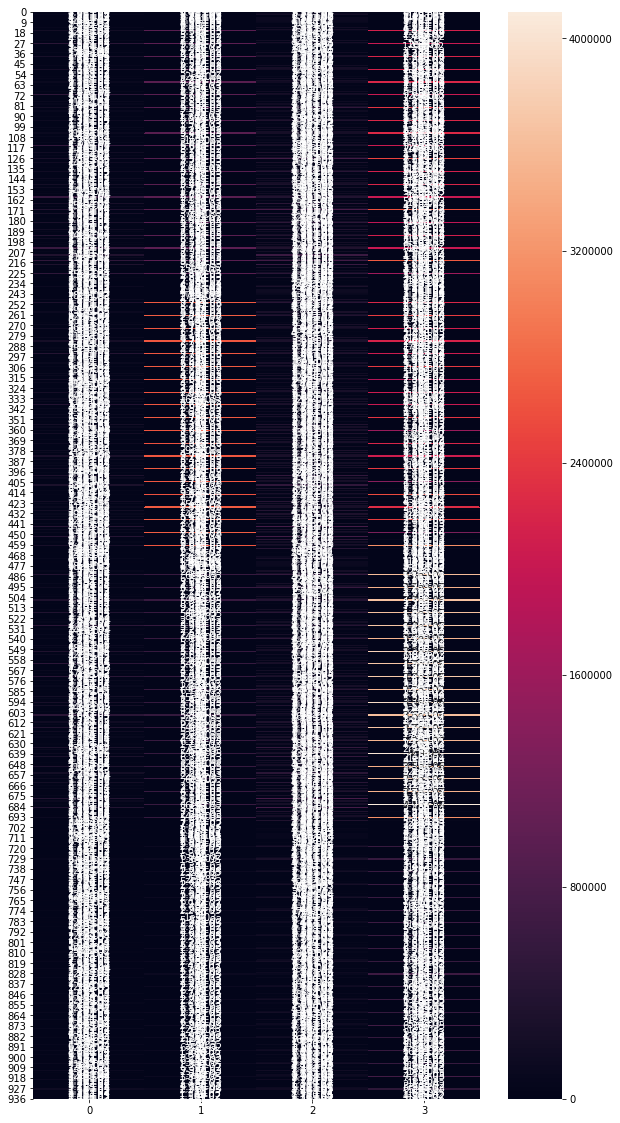

In [40]:
# UNNORMALIZED DATA
# Visualize the coefficients of the linear regressors for each class
plt.figure(figsize=(10,20))
sns.heatmap(np.abs(np.round(model_unnorm.coef_.T, decimals=0)), annot=True)

In case of unnormalized data the coefficients are scaled according to the features' absolute values. Thus, it's difficult to see which feature is more or less important since their coefficients are highly correlated with their absolute values.

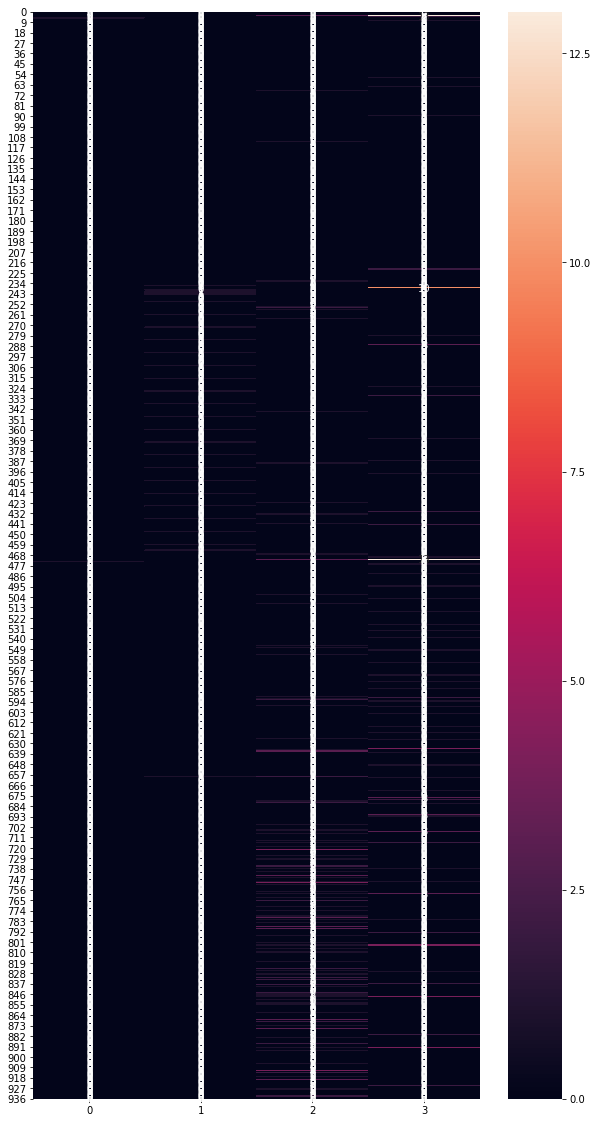

In [41]:
# NORMALIZED DATA
# Visualize the coefficients of the linear regressors for each class
plt.figure(figsize=(10,20))
sns.heatmap(np.abs(np.round(model_norm.coef_.T, decimals=0)), annot=True)

In case of normalized data, coefficients are not dependent on the features absolute values and it becomes clear which features are more important for each class.

In [42]:
for i in range(4):
    f_name = x.columns[np.abs(model_norm.coef_[i]).argmax()]
    print(f'For class {i} the most important feature is {f_name}')

For class 0 the most important feature is g_Perc.01%
For class 1 the most important feature is r_Perc.10%
For class 2 the most important feature is b_S(1,-1)InvDfMom
For class 3 the most important feature is gray_Skewness


As we can see, the result correspond to all the other feature selection methods.

### Вывод

Исходя из графика зависимости точности от выбранных признаков, мы можем сказать, что наиболее точным оказался алгоритм Extra Tree Classifier, при котором уже при первых 10 признаках мы получаем довольно высокую точность. Далее, при увеличении кол-ва признаков, точность для разных способов отбора признаков выравнивается.
